# Project 7 Machine Learning

Nolan Moss

https://github.com/Crusoe22/datafun-07-applied 

In [153]:
import pandas as pd 
import seaborn as sns
import matplotlib as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1 -Chart a Straight line

In [154]:
# Fahrenheit temperature conversion to Celsius
c = lambda f: 5 / 9 * (f - 32)

# Store Fahrenheit and Celsius pair as a tuple in temps
temps = [(f, c(f)) for f in range(0, 101, 10)]

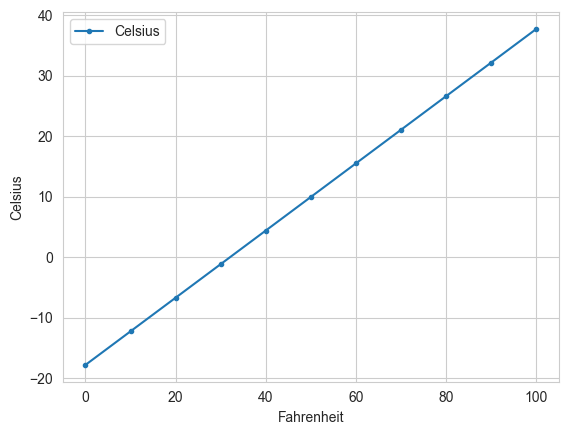

In [155]:
# Display linear relationsip between Fahrenheit and Celsius temperatures
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2

### Section 1 - Data Acquisition 

In [156]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv') # nyc DataFrame

### Section 2 - Data Inspection 

In [157]:
nyc.head()

nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning 

In [158]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

nyc.head(3)

nyc.Date.dtype

nyc.Date = nyc.Date.floordiv(100)

nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [159]:
pd.set_option('display.precision', 2)
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

Observation: 

There are 124 observations the mean value is 37.60 and the lowest and highest values are 26.10 and 47.60 degrees.

### Section 5 - Build the Model

In [160]:
# Calculate a regression of line's slope and intercept
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

linear_regression.slope

linear_regression.intercept

8.694993233674289

### Section 6 - Predict

In [161]:
# Use simple linear regression to predict temperature
linear_regression.slope * 2024 +linear_regression.intercept

38.5922281667978

### Section 7 - Visualizations

Text(0.5, 1.0, 'NYC Temperature Prediction')

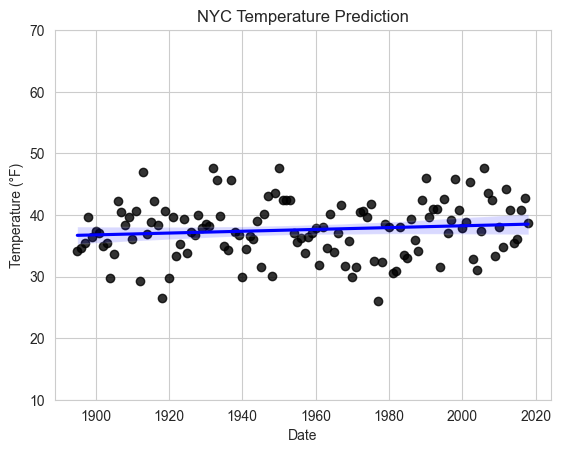

In [162]:
# Set style
sns.set_style('whitegrid')

# Create the regression plot
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature, color='blue', scatter_kws={'color': 'black'})

# Set the y-axis limits
axes.set_ylim(10, 70)

# Set labels and title
axes.set_xlabel('Date')
axes.set_ylabel('Temperature (°F)')
axes.set_title('NYC Temperature Prediction')


## Part 3

### Section 1 - Build the Model

In [163]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1, 1), nyc.Temperature.values,
                                                    random_state=11)

X_train.shape

X_test.shape

# Train the model using Linear Regression Fit
linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

# Returned coef_ and intercept_
linear_regression.coef_

linear_regression.intercept_

-0.30779820252656975

### Section 2 - Test the Model

In [164]:
predicted = linear_regression.predict(X_test)

expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict

In [165]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

predict(2024)

array([38.94094855])

### Section 4 - Visualizations